# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [11]:
import pandas as pd
import numpy as np
import random
import math

In [12]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [16]:
X_train

,bias,experience,salary
71,1,5.3,48000
124,1,8.1,66000
184,1,3.9,60000
97,1,0.2,45000
149,1,1.1,66000
...,...,...,...
67,1,6.7,64000
192,1,4.8,73000
117,1,7.0,86000
47,1,7.6,78000


## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


In [18]:
bias_train

0      1
1      1
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: bias, Length: 150, dtype: int64

이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [19]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [20]:
# parameter 개수
N = len(X_train.loc[0])

In [21]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.7706733 , 0.90977198, 0.07058985])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [22]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## p = $\frac{1}{1+e^{-x_i\theta}}$

In [23]:
def logistic(X, parameters):
    z = np.dot(X,parameters)
    p = 1/(1+np.exp(-z)) 
    return p

In [24]:
logistic(X_train.iloc[1], parameters)

0.8644042326603332

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) =$ $-\sum(y_ilogp(X_i)+(1-y_i)log(1-p(X_i)))$

In [25]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

In [26]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X,parameters.T)
    loss = 0.5*((y-y_hat)**2)
    return loss

In [27]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [28]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1771864131294858

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\sum(y_i-\theta^TX_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\sum(y_i-p_i)X_{ij}$

In [29]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = -(y-p)*X[j]
    return gradient

In [30]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.055832462209870606

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [31]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    return gradients

In [32]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[55.8715287387789, 10.078558503558469, 35.69371351067907]

## mini-batch
인덱스로 미니 배치 나누기

In [33]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
- batch size = batch의 크기를 말하며, 전체 데이터를 n개의 배치로 나누어서 학습시 필요한 연산에 드는 시간과 수렴속도를 최적화하고자 하였다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [34]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= -learning_rate / n
    parameters += gradients
    return parameters

In [35]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.76694853, 0.90910008, 0.06821027])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: batch cycle 한번을 돌면 한 에폭이 끝났다고 표현한다.   
- num_epoch: 전체 에폭의 개수
<br>

BGD: 학습한번에 모든 데이터셋을 사용하여 기울기를 업데이트함  
SGD: 학습 한번에 랜덤한 1개의 데이터를 샘플링하여 기울기를 업데이트함.
MGD: 학습 한번에 데이터셋의 일부만 사용하여 기울기를 업데이트함. 
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> "SGD"  
batch_size=k -> "MGD"  
batch_size=whole -> "BGD"  

In [36]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            # 중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [37]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.8233595187844919  params: [0.38165214 0.79225474 0.21239739]  gradients: [-0.030091066615645572, -0.008475374369868397, -0.026592281685561114]
epoch: 100  loss: 0.4338172658745838  params: [-0.84108019  1.03532095 -0.94331634]  gradients: [-0.0038402504656880223, 0.005378520809186292, -0.0058961357309340375]
epoch: 200  loss: 0.38261076049922493  params: [-1.05697755  1.51094417 -1.42429686]  gradients: [-0.0013065522227670872, 0.004117244235110976, -0.004030134198553205]
epoch: 300  loss: 0.3562375261213996  params: [-1.16040758  1.87049198 -1.77418445]  gradients: [-0.0008609826809678783, 0.0031524549929194657, -0.0030542081326806543]
epoch: 400  loss: 0.34033731459449845  params: [-1.23711036  2.15148159 -2.04558198]  gradients: [-0.0006918946180974318, 0.0025148474286010095, -0.002421644722460684]
epoch: 500  loss: 0.32993497902092583  params: [-1.30056591  2.37928344 -2.26438131]  gradients: [-0.0005840549540491074, 0.0020701884909702624, -0.0019833608888904547]


array([-1.51004497,  3.09708227, -2.94650745])

In [38]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.289328363082948  params: [-0.84785119  0.92500494 -1.0625221 ]  gradients: [-0.026009890689350446, -0.014154607390774926, -0.018300318283985925]
epoch: 100  loss: 0.07736678718219837  params: [-1.93032492  4.17501727 -4.0676891 ]  gradients: [-0.007538550286098709, -0.004102486276077694, -0.005304054187814228]
epoch: 200  loss: 0.07736266552767476  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [-0.007538159522386414, -0.004102273622091711, -0.00530377925008403]
epoch: 300  loss: 0.07736266518361776  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [-0.007538159489767191, -0.004102273604340298, -0.005303779227133446]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [-0.007538159489764568, -0.004102273604338871, -0.0053037792271316015]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [-0.007538159489764568, -0.004102273604338871, -0.0053037792271316015]
e

array([-1.9303681 ,  4.17514311, -4.06780375])

In [39]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 64)
new_param_mgd

epoch: 0  loss: 0.8617030178580201  params: [0.37560479 0.45785769 0.08759173]  gradients: [-0.03136971025586219, -0.017494858057255896, -0.039756076008092604]
epoch: 100  loss: 0.371706280523518  params: [-1.15368951  1.82138683 -1.79088129]  gradients: [-0.0012823012611960936, 0.0007686191125376008, -0.006361989421484841]
epoch: 200  loss: 0.33069910710240485  params: [-1.38883728  2.55310029 -2.47709321]  gradients: [-0.002450058404993553, 0.00010842260138337134, -0.003592176800713633]
epoch: 300  loss: 0.31458399609050464  params: [-1.54329304  2.99245437 -2.88648041]  gradients: [-0.0031400947564799173, -0.0002469153280489743, -0.0023751361710041326]
epoch: 400  loss: 0.306362198722164  params: [-1.65266529  3.29148621 -3.16366087]  gradients: [-0.0035934700891193444, -0.0004692202556059772, -0.0016888786999700116]
epoch: 500  loss: 0.3015619088817053  params: [-1.73369376  3.50838274 -3.3639202 ]  gradients: [-0.003912916176050352, -0.0006206881253428796, -0.0012500450847595735]


array([-1.93680156,  4.03930781, -3.85124505])

### Predict Label

In [40]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [41]:
from sklearn.metrics import *

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [43]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [44]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [45]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [46]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.35987311, 2.72566525])

In [47]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.5937339530729335  params: [1.26026024 0.51294199]  gradients: [0.0545177803670581, 0.018652432472443328]
epoch: 100  loss: 0.6675755251095019  params: [0.47633181 2.66207993]  gradients: [0.06172837973081416, 0.01656121921764783]
epoch: 200  loss: 0.6676735138763467  params: [0.47594166 2.66289666]  gradients: [0.06174149751514071, 0.016563900404549553]
epoch: 300  loss: 0.6676735528584552  params: [0.4759415  2.66289698]  gradients: [0.06174150273294936, 0.016563901471034554]
epoch: 400  loss: 0.6676735528739611  params: [0.4759415  2.66289698]  gradients: [0.06174150273502484, 0.01656390147145877]
epoch: 500  loss: 0.6676735528739676  params: [0.4759415  2.66289698]  gradients: [0.0617415027350257, 0.01656390147145894]
epoch: 600  loss: 0.6676735528739676  params: [0.4759415  2.66289698]  gradients: [0.0617415027350257, 0.01656390147145894]
epoch: 700  loss: 0.6676735528739676  params: [0.4759415  2.66289698]  gradients: [0.0617415027350257, 0.01656390147145894]
epo

array([0.4759415 , 2.66289698])

In [48]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

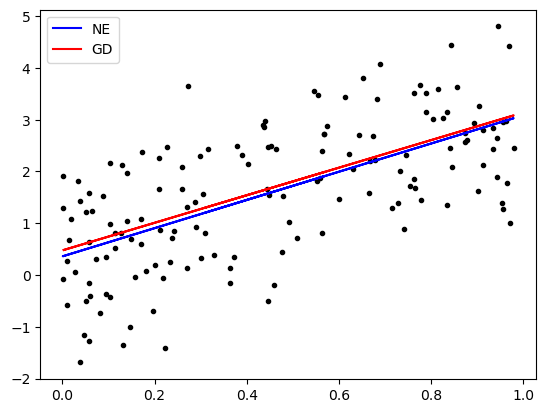

In [49]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()